In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
# Upload the fitting results for the C12 model
bat_casey = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

bat_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_mle.csv', index_col=0)
bat_decompir_uncertain = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_uncertainties.csv', index_col=0)
bat_decompir = bat_decompir.join(bat_decompir_uncertain)
bat_decompir_undetected = pd.read_csv(sed_fit_dir+'analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_undetected.csv', index_col=0)

bat_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)
bat_dale14_undetected = pd.read_csv(sed_fit_dir+'analysis/dale14_results/final_fit_results_dale14_undetected.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources)

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [13]:
# Combine the SF luminosities into one DataFrame
bat_decompir['lir_sf'] = bat_decompir['lir_total'] + np.log10(1-bat_decompir['agn_frac'])
bat_dale14['lir_sf'] = bat_dale14['lir_total'] + np.log10(1-bat_dale14['agn_frac_total'])
bat_lir = pd.DataFrame(index=bat_casey[bat_casey['lir_sf_flag']==0].index)
bat_lir['LSFC12'] = bat_casey['lir_sf']
bat_lir['LSFDecompIR'] = bat_decompir['lir_sf']
bat_lir['LSFDale14'] = bat_dale14['lir_sf']


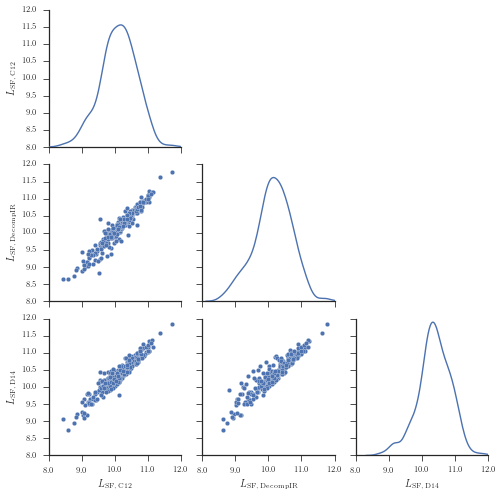

In [14]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_lir, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$L_{\rm SF,\,D14}$')
    ax.set_xlim(8.0, 12.0)    
    ax.xaxis.set_ticks([8.0, 9.0, 10.0, 11.0, 12.0])
    ax.xaxis.set_ticklabels(['8.0', '9.0', '10.0', '11.0', '12.0'])

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,C12}$')
        #ax.yaxis.set_ticklabels([])
    elif i == 1:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$L_{\rm SF,\,D14}$')
    ax.set_ylim(8.0, 12.0)
#        if j == 0:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,C12}$')          
#        if j == 1:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,DecompIR}$')
#        if j == 2:
#            #g.axes[i, j].yaxis.set_label_text(r'$L_{\rm IR\,D14}$')
g.fig.savefig(figsave_dir+'lsf_total-comparison.pdf', bbox_inches='tight')

Notes:
Need to change the axis labels [DONE]
Need to adjust the line-width and marker sizes [no need to]
Need to adjust tick labels especially for x-axis [DONE]

In [15]:
# Analysis
bat_lir['LSFC12'].describe()

count    267.000000
mean      10.111451
std        0.532744
min        8.443852
25%        9.790304
50%       10.132776
75%       10.459881
max       11.719786
Name: LSFC12, dtype: float64

In [16]:
bat_lir['LSFDecompIR'].describe()

count    267.000000
mean      10.141088
std        0.554952
min        8.637631
25%        9.837793
50%       10.165144
75%       10.518359
max       11.767477
Name: LSFDecompIR, dtype: float64

In [17]:
bat_lir['LSFDale14'].describe()

count    267.000000
mean      10.373375
std        0.490301
min        8.749546
25%       10.130531
50%       10.397524
75%       10.707635
max       11.846215
Name: LSFDale14, dtype: float64

In [18]:
(bat_lir['LSFC12'] - bat_lir['LSFDecompIR']).describe()

count    267.000000
mean      -0.029638
std        0.156814
min       -0.835039
25%       -0.105743
50%       -0.039345
75%        0.028502
max        0.704275
dtype: float64

In [19]:
(bat_lir['LSFDale14'] - bat_lir['LSFC12']).describe()

count    267.000000
mean       0.261925
std        0.163471
min       -0.371414
25%        0.143118
50%        0.241655
75%        0.369083
max        0.879951
dtype: float64

In [20]:
(bat_lir['LSFDale14'] - bat_lir['LSFDecompIR']).describe()

count    267.000000
mean       0.232287
std        0.203075
min       -0.067356
25%        0.085872
50%        0.201273
75%        0.315474
max        1.082677
dtype: float64